How many days do you want to simulate :  7


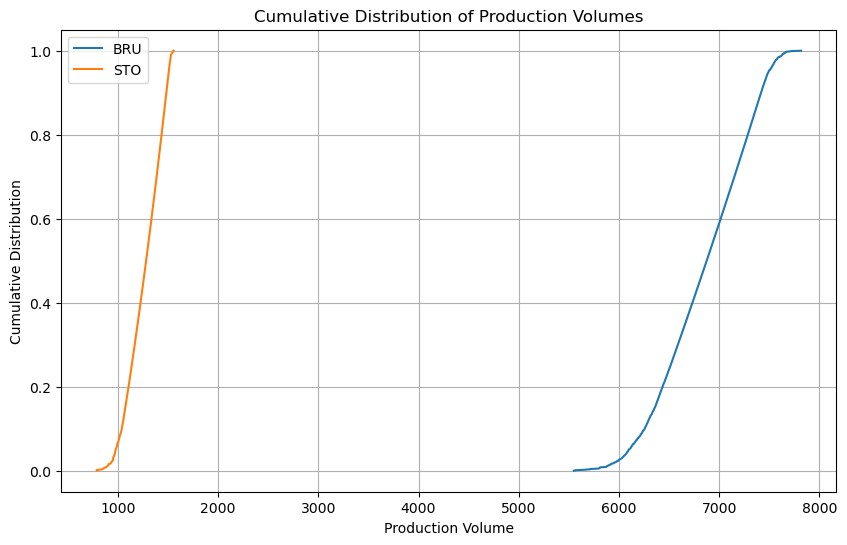

In [9]:
# import pandas as pd
import numpy as np
import pandas as pd
import openpyxl
from pathlib import Path
import random
import matplotlib.pyplot as plt

def simulation_pp(data, param_days):
    """
    Simulate the production process for the given data

    Parameters :
        data (dictionary-like) : history of production for each plant
                                 key = plant
                                 value = list of production per day
        param_days : amount af days to be simulated

    Returns:
        simulation_data (dictionary-like) : simulated production for # days
                                            key = plant
                                            value = list of production for # days

    """
    simulation_data = {}
    for param_plant, param_production in data.items():
        number = len(param_production)
        simulated_production = []
        for i in range(10**4):
            cum_prod = 0
            
            for j in range(days):
                cum_prod += param_production[random.randint(0,number-1)]
                
            simulated_production.append(cum_prod)
            
        simulation_data[param_plant] = simulated_production

    return(simulation_data)
                
        
# Get excel-files in intermediate map
base_path = Path("..") / "data"
intermediate_path = base_path / "intermediate"
xlsx_files = [f for f in intermediate_path.glob('*.xlsx')]

# Prepare data for simulation, eliminating 0 and #MV-values
production_dict = {}
for xlsx_file in xlsx_files:
    plant = str(xlsx_file)[-8 : -5]
    df = pd.read_excel(xlsx_file)
    filtered_df = df[(df['production']!="#MV") & (df['production'] != 0)].copy()
    filtered_df['production'] = filtered_df['production'].astype(int)
    production_data = filtered_df['production'].values
    production_dict[plant]=production_data


days = int(input("How many days do you want to simulate : "))

production_data = simulation_pp(production_dict,days) #get simulated data for chosen amount of days


# Plotting the cumulative distribution for each plant
plt.figure(figsize=(10, 6))

for plant, production_volumes in production_data.items():
    sorted_volumes = np.sort(production_volumes) # Sort the volumes
    # create the cumulative sum for each sorted value
    cdf = np.zeros(len(sorted_volumes))
    cdf[0]= sorted_volumes[0]
    for i in range (1,len(sorted_volumes)):
        if sorted_volumes[i] == sorted_volumes[i-1]:
            cdf[i] = cdf[i-1]
        else:
            cdf[i] = cdf[i-1] + sorted_volumes[i]
        
    cdf = cdf / cdf[-1]  # divide every item by the total_sum to get values between 0 and 1

    # Plot the cumulative distribution of the plant
    plt.plot(sorted_volumes, cdf, label=plant)


plt.xlabel('Production Volume')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of Production Volumes')
plt.legend()
plt.grid(True)
plt.show()

